# Basics: loading and thresholding
## Setup

In [30]:
# Imports
import skimage as ski
import matplotlib.pyplot as plt
from im_func import show_image

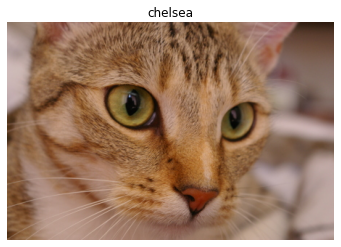

In [32]:
# Load stock image using function
# image = data.astronaut()
# Load stock image using name
title = 'chelsea'
# caller = getattr(data, name)
image = getattr(ski.data, title)()


show_image(image, title)

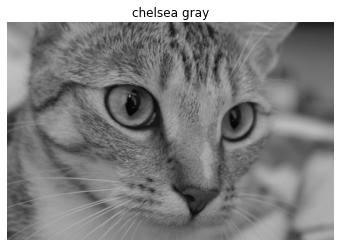

In [33]:
# Convert to rgb
image_gray = ski.color.rgb2gray(image)
show_image(image_gray,title + ' gray',vmin=0,vmax=1,show_colorbar=False)

# Global thresholding

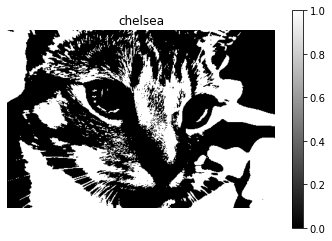

In [34]:
# Basic thresholding
thr = 0.5
image_thr = (image_gray>=thr)#.astype(int)
show_image(image_thr,title,show_colorbar=True)

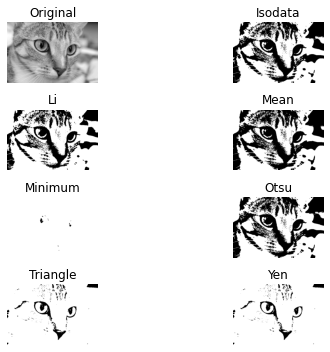

In [35]:
# Global thresholding with skimage, try all
fig, ax = ski.filters.try_all_threshold(image_gray, verbose=False)

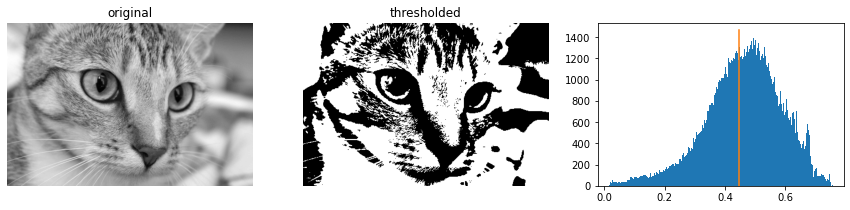

In [36]:
# Using only one method
thr = ski.filters.threshold_otsu(image_gray)
image_thr = image_gray>thr

# Plot
fig, ax = plt.subplots(1,3,figsize=[15,3])
plt.sca(ax[0])
show_image(image_gray,'original')
plt.sca(ax[1])
show_image(image_thr,'thresholded')
plt.sca(ax[2])
_ = plt.hist(image_gray.ravel(),bins=256)
_ = plt.plot([thr, thr],[0,plt.ylim()[1]])

# Local thresholding

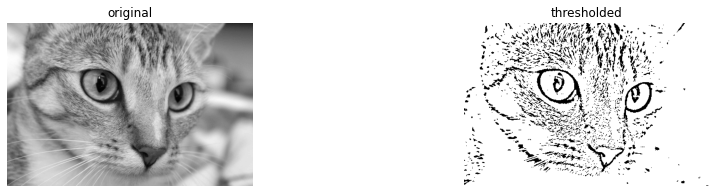

In [48]:
# Using only one method
thr = ski.filters.threshold_local(image_gray,block_size=21,offset=0.04)
image_thr = image_gray>thr

# Plot
fig, ax = plt.subplots(1,2,figsize=[15,3])
plt.sca(ax[0])
show_image(image_gray,'original')
plt.sca(ax[1])
show_image(image_thr,'thresholded')

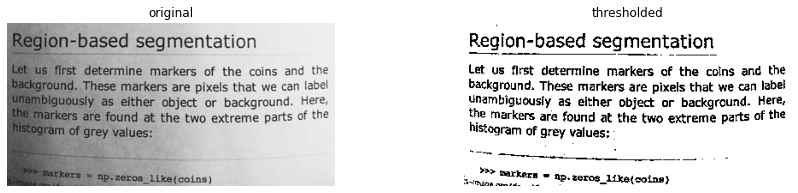

In [59]:
# Using the page example
temp_image = ski.data.page()
thr = ski.filters.threshold_local(temp_image, 35,offset=12)
image_thr = temp_image>thr

# Plot
fig, ax = plt.subplots(1,2,figsize=[15,3])
plt.sca(ax[0])
show_image(temp_image,'original')
plt.sca(ax[1])
show_image(image_thr,'thresholded')